# Modelos Estatísticos Clássicos

* [x] Análise Exploratória de Dados
* [x] Testes de hipótese
* [x] Regressão Linear
* [x] Regressão Logística
* [x] Modelos Lineares Generalizados
    * [x] Regressão Logística (de novo, mas de um jeito novo)
    * [x] Regressão de Poisson
* [x] Séries Temporais:
    * [x] ACF e PACF
    * [x] Teste de Raiz Unitária 
    * [x] ARIMA
    * [x] Auto-Arima
* [x] Bootstrapping

# Importa pacotes de uso geral

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importa dados

In [70]:
df = pd.read_excel('dados/imoveis.xls')
df.head()

,Mês,Preço,Área,Quartos,Idade,Localização,Corretora
0,Março,92500,1605,3,6,Dallas,Outra corretora
1,Março,143800,2741,4,5,Dallas,Outra corretora
2,Março,130500,2393,3,7,Dallas,Outra corretora
3,Março,123100,2209,4,8,Dallas,Outra corretora
4,Março,98800,1544,3,7,Dallas,Outra corretora


# O problema de negócio

A corretora Easton está sendo acusada de praticar _dumping_!  
O que dizem os dados?

In [71]:
df[['Corretora','Preço']].groupby('Corretora').mean().round()

,Preço
Corretora,
Easton,87112.0
Outra corretora,94118.0


# Testes de hipótese

In [72]:
precos_easton = df.loc[df.Corretora == 'Easton', 'Preço']
precos_outras = df.loc[df.Corretora != 'Easton', 'Preço']

In [73]:
from scipy.stats import shapiro, levene, ttest_ind, median_test

In [74]:
print(shapiro(precos_easton))
print(shapiro(precos_outras))

ShapiroResult(statistic=0.9495602250099182, pvalue=0.03545036539435387)
ShapiroResult(statistic=0.9895817041397095, pvalue=0.002066616667434573)


In [75]:
_, p, _, _ = median_test(precos_easton, precos_outras)
print(p)

0.0032194401914435755


E se tivéssemos preços normais e quiséssemos fazer um teste de comparação de médias?

In [76]:
#Teste de igualdade entre variâncias populacionais
levene(precos_easton, precos_outras)

LeveneResult(statistic=7.137938346307354, pvalue=0.007785507943627083)

In [77]:
#Teste de hipótese de comparação de médias de amostras independentes
ttest_ind(precos_easton, precos_outras, alternative = 'less', equal_var=False)

Ttest_indResult(statistic=-3.0791112401030927, pvalue=0.0015278028735895924)

# Preparação dos dados

In [78]:
df.dtypes

Mês            object
Preço           int64
Área            int64
Quartos         int64
Idade           int64
Localização    object
Corretora      object
dtype: object

In [79]:
df = pd.get_dummies(df, dtype='int64')
df.head()

,Preço,Área,Quartos,Idade,Mês_Abril,Mês_Junho,Mês_Maio,Mês_Março,Localização_Dallas,Localização_Demais municípios da Região Metropolitana,Localização_Fort Worth,Corretora_Easton,Corretora_Outra corretora
0,92500,1605,3,6,0,0,0,1,1,0,0,0,1
1,143800,2741,4,5,0,0,0,1,1,0,0,0,1
2,130500,2393,3,7,0,0,0,1,1,0,0,0,1
3,123100,2209,4,8,0,0,0,1,1,0,0,0,1
4,98800,1544,3,7,0,0,0,1,1,0,0,0,1


In [80]:
df.dtypes

Preço                                                    int64
Área                                                     int64
Quartos                                                  int64
Idade                                                    int64
Mês_Abril                                                int64
Mês_Junho                                                int64
Mês_Maio                                                 int64
Mês_Março                                                int64
Localização_Dallas                                       int64
Localização_Demais municípios da Região Metropolitana    int64
Localização_Fort Worth                                   int64
Corretora_Easton                                         int64
Corretora_Outra corretora                                int64
dtype: object

In [81]:
df = df.drop(columns=['Mês_Março','Localização_Demais municípios da Região Metropolitana','Corretora_Outra corretora'])

In [82]:
df.dtypes

Preço                     int64
Área                      int64
Quartos                   int64
Idade                     int64
Mês_Abril                 int64
Mês_Junho                 int64
Mês_Maio                  int64
Localização_Dallas        int64
Localização_Fort Worth    int64
Corretora_Easton          int64
dtype: object

# EDA

In [ ]:
#!pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

In [83]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Alternativas ao pandas_profilling:

* [SweetViz](https://pypi.org/project/sweetviz/)
* [AutoViz](https://pypi.org/project/autoviz/)
* [DTale](https://pypi.org/project/dtale/)
* [Pandas GUI](https://pypi.org/project/pandasgui/)
* [BitRook](https://www.bitrook.com/)
* [Lux](https://lux-api.readthedocs.io/en/latest/source/getting_started/overview.html)

# Regressão Linear

In [234]:
import statsmodels.api as sm

In [84]:
y = df['Preço']
X = df.drop(columns=['Preço'])

In [85]:
X = sm.add_constant(X)
X.head()

,const,Área,Quartos,Idade,Mês_Abril,Mês_Junho,Mês_Maio,Localização_Dallas,Localização_Fort Worth,Corretora_Easton
0,1.0,1605,3,6,0,0,0,1,0,0
1,1.0,2741,4,5,0,0,0,1,0,0
2,1.0,2393,3,7,0,0,0,1,0,0
3,1.0,2209,4,8,0,0,0,1,0,0
4,1.0,1544,3,7,0,0,0,1,0,0


In [86]:
linreg = sm.OLS(y, X).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     648.2
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          5.73e-272
Time:                        16:25:50   Log-Likelihood:                -5155.0
No. Observations:                 518   AIC:                         1.033e+04
Df Residuals:                     508   BIC:                         1.037e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.04

In [87]:
linreg.resid.head()

0   -6138.642227
1     574.757773
2    1647.594780
3     603.156889
4    2597.064805
dtype: float64

<AxesSubplot:>

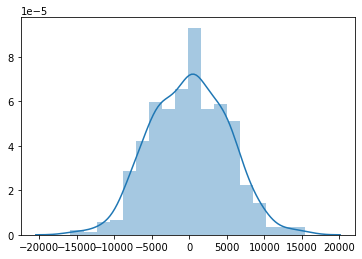

In [88]:
#Histograma dos resíduos
sns.distplot(linreg.resid)

In [89]:
#Teste da normalidade dos resíduos
shapiro(linreg.resid)

ShapiroResult(statistic=0.9973931312561035, pvalue=0.5946245193481445)

<AxesSubplot:>

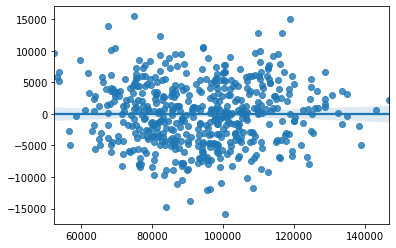

In [90]:
#Diagrama de dispersão dos resíduos
sns.regplot(linreg.fittedvalues, linreg.resid)

In [91]:
#Outliers e observações influentes
#dfbetas, distância de cook, resíduos padronizados e studentizados, alavancagem e dffit 
linreg.get_influence().summary_frame().head()

,dfb_const,dfb_Área,dfb_Quartos,dfb_Idade,dfb_Mês_Abril,dfb_Mês_Junho,dfb_Mês_Maio,dfb_Localização_Dallas,dfb_Localização_Fort Worth,dfb_Corretora_Easton,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.045203,0.052295,-0.031712,-0.001635,0.069411,0.071148,0.067029,-0.034842,0.005162,0.002813,0.001583,-1.203561,0.010810,-0.125818,-1.204094,-0.125874
1,-0.007487,0.010531,-0.000473,-0.003011,-0.006348,-0.005586,-0.006057,0.004769,0.001451,-0.000801,0.000030,0.113377,0.022789,0.017314,0.113267,0.017297
2,-0.010205,0.029697,-0.019785,0.007125,-0.018373,-0.016344,-0.017531,0.011056,0.001278,-0.001161,0.000189,0.324164,0.017701,0.043516,0.323878,0.043477
3,-0.005530,0.000110,0.005964,0.004536,-0.007011,-0.006495,-0.006679,0.004711,0.000405,-0.000552,0.000022,0.118516,0.015127,0.014688,0.118401,0.014674
4,0.017750,-0.027520,0.016194,0.011613,-0.029813,-0.030425,-0.028730,0.014738,-0.003072,-0.000911,0.000324,0.509579,0.012327,0.056930,0.509208,0.056888


In [92]:
linreg.get_prediction(X).summary_frame().head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,98638.642227,533.188254,97591.116715,99686.167739,88509.253197,108768.031256
1,143225.242227,774.156818,141704.299087,144746.185367,133036.008671,153414.475782
2,128852.405220,682.286102,127511.955400,130192.855039,118688.546792,139016.263647
3,122496.843111,630.731692,121257.679394,123736.006829,112345.846159,132647.840064
4,96202.935195,569.373521,95084.318486,97321.551904,86065.947686,106339.922704


# Regressão Logística

In [93]:
X = df[['Área', 'Quartos', 'Idade', 'Localização_Dallas', 'Localização_Fort Worth']]
y = df['Corretora_Easton']

In [94]:
X = sm.add_constant(X)
X.head()

,const,Área,Quartos,Idade,Localização_Dallas,Localização_Fort Worth
0,1.0,1605,3,6,1,0
1,1.0,2741,4,5,1,0
2,1.0,2393,3,7,1,0
3,1.0,2209,4,8,1,0
4,1.0,1544,3,7,1,0


In [95]:
logreg = sm.Logit(y,X).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.287061
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       Corretora_Easton   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                 0.08299
Time:                        16:26:00   Log-Likelihood:                -148.70
converged:                       True   LL-Null:                       -162.16
Covariance Type:            nonrobust   LLR p-value:                 5.925e-05
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.3486      1.072     -2.191      0.028      -4.449      

# Modelos Lineares Generalizados (GLM)

## Brevíssima revisão 

Regressão tradicional (notação simplificada):

$$
y = \beta_0 + \beta_1X_1 + ...
$$

O que acontece se...

* $y \in \{0,1\}$? (sim/não)
* $y \in \{0,1,2,3,...\}$? (contagem)
* $y \in (0; 1)$?  (porcentagem)
* $y \in \{Classe 1, Classe 2, Classe 3 ,...\}$ (classificação)
* $y \in \{Nível 1, Nível 2, Nível 3 ,...\}$ (classificação ordinal)

> Uma regressão linear simples exige que y possa (em teoria, pelo menos) ser qualquer número real!

Solução:

Usar uma função $g(\cdot)$ que transforme os valores de $y$ em números reais: 

$$
g: (\text{valores possíveis para y}) \rightarrow \mathbb{R}
$$

Assim, poderemos fazer (notação simplificada):

$$
g(y) = \beta_0 + \beta_1X_1 + ...
$$

Esta é a expressão geral do __modelo de regressão linear generalizados__.

Dependendo da escolha de $g$ teremos modelos diferentes, com aplicações distintas:

* Regressão Logit / Probit
* Regressão ordinal
* Regressão de Poisson / Binomial Negativa
* Regressão Beta
* Regressão Tweedie
* Regressões com inflação (ZIP e BZOI)
* etc.


## Regressão Logística (de novo)

In [96]:
#Logit de novo, mas chamando como um caso particular de GLM...
logit_2 = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(logit_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Corretora_Easton   No. Observations:                  518
Model:                            GLM   Df Residuals:                      512
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -148.70
Date:                Sat, 23 Jul 2022   Deviance:                       297.40
Time:                        16:26:03   Pearson chi2:                     520.
No. Iterations:                     6   Pseudo R-squ. (CS):            0.05063
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

## Regressão de Poisson

In [97]:
y = df['Quartos']
X = df[['Idade','Localização_Dallas','Localização_Fort Worth']]

poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Quartos   No. Observations:                  518
Model:                            GLM   Df Residuals:                      515
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -879.40
Date:                Sat, 23 Jul 2022   Deviance:                       205.24
Time:                        16:26:04   Pearson chi2:                     237.
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.3033
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Idade                      0

# Séries temporais

## Brevíssima revisão

### Estacionariedade

* Forte
* Fraca
    * $E(y_t)$ é o mesmo, independentemente do valor de $t$
    * $V(y_t)$ é o mesmo, independentemente do valor de $t$
    * $Cov(y_{t1}, y_{t2})$ não depende nem de $t_1$ nem de $t_2$ mas apenas de quanto tempo se passou entre $t_1$ e $t_2$

### AR(1)

$$
y_t = \rho y_{t-1} + \epsilon_t  
$$

$$
\epsilon \sim N(0,\sigma^2)
$$

Supondo estacionariedade da série...

* Como você espera que seja a correlação de $y_t$ com ...
    * $y_{t-1}$? 
    * $y_{t-2}$? 
    * $y_{t-3}$? 
    * $y_{t-200}$?
* Como você espera que seja a variância desta série com...
    * $\rho = 0$?
    * $\rho = 1000$? (é razoável?)
    * $\rho = 0.5$? 
    * $\rho = -0.5$?


$$
E(y_t) = E(y_{t-1}) \implies E(y_t) = \rho E(y_t) = 0
$$

(e se houver tendência?)

$$
V(y_t) = V(y_{t-1}) \implies V(y_t) = \rho^2 V(y_t) + \sigma^2 \implies V(y_t) = \frac{\sigma^2}{1-\rho^2}
$$

Ou seja, devemos ter $ |\rho| < 1$ para série estacionária.

$$
\begin{align}
\gamma(h) \equiv &Cov(y_t; y_{t-h}) = \\
&Cov(\rho y_{t-1} + \epsilon_{t}; y_{t-h})= \\
&\rho Cov(y_{t-1};y_{t-h}) + Cov(\epsilon_{t}; y_{t-h}) =\\
&\rho \gamma(h-1)
\end{align}
$$

como $\gamma(0) = V(y_t)$, resulta que $\gamma(0), \gamma(1), \gamma(2), ...$ formam uma P.G. com razão $\rho$ e primeiro termo $V(y_t) = \frac{\sigma^2}{1-\rho^2}$. Como $|\rho| < 1$, essa P.G. se parece com um decaimento exponencial.

### MA(1)

$$
y_t = \rho \epsilon_{t-1} + \epsilon_t  
$$

$$
\epsilon \sim N(0,\sigma^2)
$$

Supondo estacionariedade da série...

* Como você espera que seja a correlação de $y_t$ com ...
    * $y_{t-1}$? 
    * $y_{t-2}$? 
    * $y_{t-3}$? 
    * $y_{t-200}$?
* Como você espera que seja a variância desta série com...
    * $\rho = 0$?
    * $\rho = 1000$? (é razoável?)
    * $\rho = 0.5$? 
    * $\rho = -0.5$?

### ARMA(1,1)

ARMA = AR + MA

$$
y_t = AR(1) + MA(1) = \rho y_{t-1} + \phi \epsilon_{t-1} + \epsilon_t
$$

### Determinação das ordens dos modelos usando ACF e PACF

![image.png](attachment:529799d2-705e-4b0e-ba94-7458fc094367.png)

### ARIMA(1,1,1)

* Diferenciação como forma de eliminação de tendência
* Ordem de integração de uma série temporal
* ARIMA = AR + I de "integração" + MA
* Prós e contras da diferenciação como forma de eliminação da tendência
  
Exemplo para um Ruído Branco:
$$
V(\epsilon_t - \epsilon_{t-1}) = V(\epsilon_t) + V(\epsilon_{t-1}) = 2\sigma^2 > \sigma^2
$$

### A questão da Raiz Unitária

$$
y_t = y_{t-1} + \epsilon_{t}
$$

* Consequências da raiz unitária
* Teste de Dickey-Fuller Aumentado

## Python!

O módulo `tsa` permite desenvolver modelos em séries temporais

In [120]:
#!pip install investpy

In [121]:
from investpy import get_stock_recent_data, get_stock_historical_data
from datetime import date, timedelta

In [122]:
data_inicio = format(date.today() - timedelta(365), "%d/%m/%Y")
data_fim = format(date.today() - timedelta(1), "%d/%m/%Y")
data_inicio, data_fim

('23/07/2021', '22/07/2022')

In [123]:
petr4 = get_stock_historical_data('petr4', 'brazil', data_inicio, data_fim )['Close']
petr4.head()

Date
2021-07-23    26.74
2021-07-26    27.47
2021-07-27    27.15
2021-07-28    27.71
2021-07-29    27.81
Name: Close, dtype: float64

In [124]:
petr4.tail()

Date
2022-07-18    28.60
2022-07-19    29.18
2022-07-20    29.17
2022-07-21    29.02
2022-07-22    29.33
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

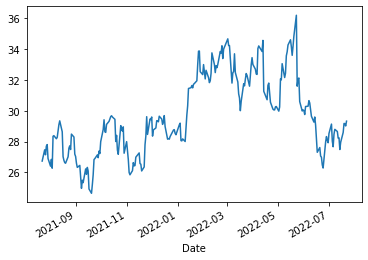

In [125]:
petr4.plot()

## Autoccorelação e autocorrelação parcial (ACF e PACF)

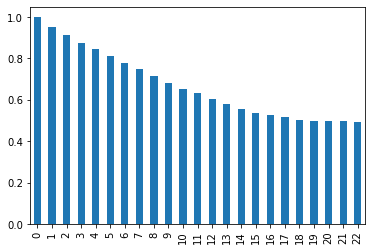

In [104]:
pd.Series(sm.tsa.acf(petr4, nlags=22)).plot(kind='bar');

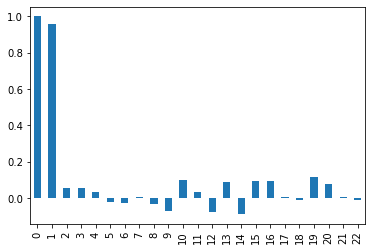

In [105]:
pd.Series(sm.tsa.pacf(petr4, nlags=22)).plot(kind='bar');

## Teste de Raiz Unitária

In [114]:
from statsmodels.tsa.stattools import adfuller

In [119]:
_, p, _, _, _, _ = adfuller(petr4)
p

0.10786030150330356

In [106]:
y = petr4.reset_index()['Close']
y

0      26.74
1      27.47
2      27.15
3      27.71
4      27.81
       ...  
245    28.60
246    29.18
247    29.17
248    29.02
249    29.33
Name: Close, Length: 250, dtype: float64

In [110]:
adfuller(petr4)

(-2.532090450061212,
 0.10786030150330356,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 533.0898140540354)

## AR, MA, ARMA e ARIMA

In [195]:
arima = sm.tsa.arima.ARIMA(y, order=(1, 0, 0), trend=[0, 1,1]).fit()
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -310.044
Date:                Fri, 22 Jul 2022   AIC                            628.088
Time:                        23:12:41   BIC                            642.174
Sample:                             0   HQIC                           633.757
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4152      0.062      6.658      0.000       0.293       0.537
x2            -0.0012      0.000     -4.490      0.000      -0.002      -0.001
ar.L1          0.9777      0.002    541.501      0.0

Análise dos resultados:
* Independência serial dos resíduos
* Heteroscedasticidade
* Normalidade dos resíduos
* Assimetria
* Curtose
* Premissas do modelos satisfeitas?
(supondo que sim, apenas para fins didáticos, continuamos a análise:)
* quais coeficientes são significantes?
* analise dos coeficientes significantes

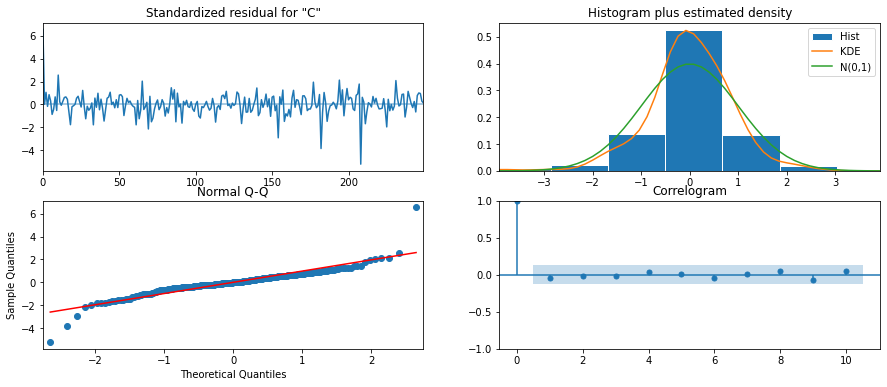

In [196]:
arima.plot_diagnostics(figsize=(15,6),lags=10);

In [197]:
arima.resid

0      26.486085
1       0.019548
2       0.899276
3      -0.141083
4       0.725185
         ...    
245     0.666413
246     0.853688
247     0.814812
248     0.244652
249     0.111383
Length: 250, dtype: float64

In [198]:
arima.forecast(steps=10)

250    28.754955
251    28.488759
252    28.221383
253    27.952798
254    27.682975
255    27.411887
256    27.139507
257    26.865808
258    26.590765
259    26.314351
Name: predicted_mean, dtype: float64

## Auto ARMA
(só funciona para séries estacionárias - não é o nosso caso)

In [199]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [200]:
auto_arma = arma_order_select_ic(y, max_ar=4, max_ma=2, ic=['aic','bic'],)

C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [176]:
auto_arma.aic

,0,1,2
0,1176.591675,930.843178,804.078998
1,573.020125,574.558571,575.699118
2,574.616556,575.984508,577.664082
3,575.719730,577.630408,579.571318
4,577.568863,579.524556,578.215616


In [ ]:
auto_arma.bic

In [180]:
#Melhor modelo segundo o AIC
auto_arma.aic_min_order

(1, 0)

In [181]:
#Melhor modelo segundo o BIC
auto_arma.bic_min_order

(1, 0)

# Bootstraping

Fornece intervalos de confiança e erros-padrão para parâmetros cujas distribuições amostrais não são conhecidas (ex.: distância interquartílica)

In [172]:
from scipy.stats import bootstrap

In [173]:
import numpy as np
x = np.random.gamma(shape=3, scale=.1, size=10000)

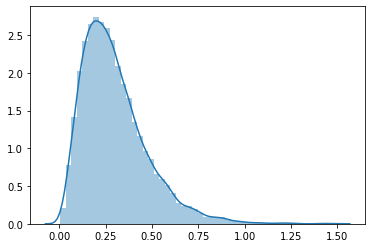

In [174]:
sns.distplot(x);

In [175]:
def IQR(x, **kwargs):
    Q3 = np.quantile(x, q=.75,**kwargs)
    Q1 = np.quantile(x, q=.25, **kwargs)
    return(Q3-Q1)

In [176]:
IQR(x)

0.21379669808450508

In [177]:
x = (x,)  # amostras devem estar em uma sequência
x

(array([0.36995296, 0.2134957 , 0.40740544, ..., 0.32937857, 0.23485239,
        0.11591816]),)

In [178]:
boot = bootstrap(x, IQR, confidence_level=0.95, n_resamples=1000)
print(boot)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.20851530221087547, high=0.21937385867705878), standard_error=0.002812352266240727)


In [179]:
#Intervalo de confiança estimado contém valor verdadeiro?
a, b = boot.confidence_interval
print((IQR(x) > a) and (IQR(x) < b))

True


## Value at Risk (VAR) empírico

<AxesSubplot:xlabel='Close'>

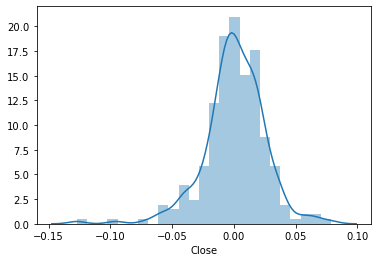

In [228]:
x = petr4.pct_change().dropna()
sns.distplot(x)

In [229]:
def var5(x, **kwargs):
    return(np.quantile(x,q=0.05,**kwargs))

In [230]:
var5(x)

-0.03941986057630131

In [231]:
x = (x,)
boot = bootstrap(x, var5, confidence_level=0.95, n_resamples=1000)
print(boot.confidence_interval)

ConfidenceInterval(low=-0.056215083798882626, high=-0.03379091869060191)


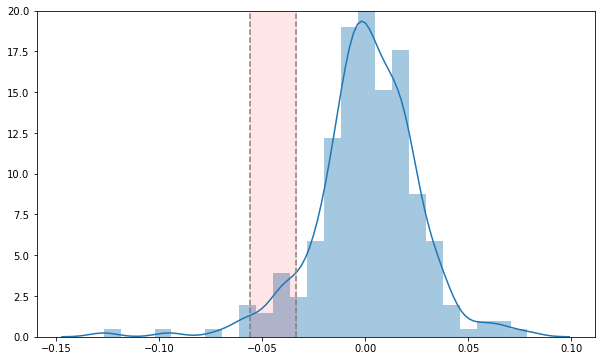

In [232]:
plt.figure(figsize=(10,6))
sns.distplot(x)
a, b = boot.confidence_interval
plt.axvline(x=a, c='gray', ls='dashed')
plt.axvline(x=b, c='gray', ls='dashed')
plt.fill_betweenx((0,100),a,b, color='red', alpha=0.1)
plt.ylim(0,20)
plt.show()